# Fitting Data

Imports used...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import norm
from scipy.special import comb

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Reading the data from `3.data`

In [4]:
data = np.loadtxt('3.data')
length = np.shape(data)[0]

## Task A

Calculating the $\mu_1$ and $\mu_2$

In [5]:
moment1 = np.sum(data)/length
moment1

6.496145618324817

In [6]:
moment2 = np.sum(data**2)/length
moment2

46.554361807879815

$\mu_1 = 6.496121071257862$ and $\mu_2 = 46.55447234919477$

## Task B

Dividing the data into bins and plotting them as a histogram gives the following plot

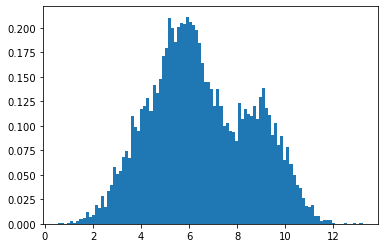

In [5]:
plt.hist(data, bins=100, density=True)
plt.savefig('../images/3b.png')
plt.show()

## Task C

For $X \sim Bin(n, p)$, <br> <br>
<div style='text-align: center;'>
    $\mu_1^{Bin} = \sum_{r=0}^{n} \binom{n}{r}p^r (1-p)^{n-r} r$ <br>
    $\mu_1^{Bin} = np$ <br> <br>
    $\mu_2^{Bin} = \sum_{r=0}^{n} \binom{n}{r}p^r (1-p)^{n-r} r^2$ <br>
    $\mu_2^{Bin} = np\sum_{r=1}^{n} \binom{n-1}{r-1}p^{r-1} (1-p)^{n-r} r$ <br>
    $\mu_2^{Bin} = np\sum_{r=0}^{n-1} \binom{n-1}{r}p^{r} (1-p)^{n-r-1} (r+1)$ <br>
    $\mu_2^{Bin} = n(n-1)p^2 + np\sum_{r=0}^{n-1} \binom{n-1}{r}p^{r} (1-p)^{n-r-1}$ <br>
    $\mu_2^{Bin} = n(n-1)p^2 + np$
</div> <br>
$\implies \mu_1^{Bin} = np$ and $\mu_2^{Bin} = n(n-1)p^2 + np$ <br>
Using the equations to approximate $\left(n^\ast, p^\ast\right)$

In [6]:
def binom_app(x):
    return [x[0]*x[1] - moment1,
            x[0]*(x[0]-1)*x[1]*x[1] + x[0]*x[1] - moment2]

In [7]:
n, p = tuple(fsolve(binom_app, [1,1]))
n = round(n)
binom_app([n, p]), binom_app([n+1, p]), (n, p)

([0.09758497442649361, 1.3427877581668284],
 [0.4272715040640591, 6.020202600782845],
 (20, 0.32968652963756556))

$n^\ast = 20$ and $p^\ast = 0.32961788596852243$ approximate the moments better.

In [8]:
x = np.linspace(0, 30, 31)
binom_data = binom.pmf(x, n, p)

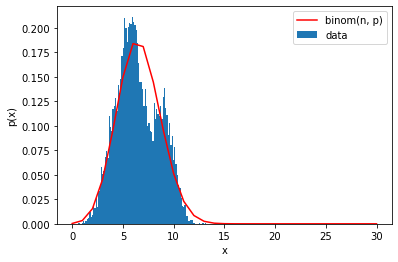

In [9]:
plt.plot(x, binom_data, color='red')
plt.hist(data, bins=100, density=True)
plt.legend(['binom(n, p)', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3c.png')
plt.show()

## Task D

For $X \sim Gamma(k, \theta)$, <br><br>
<div style='text-align: center;'>
    $\mu_1^{Gamma} = \int_0^\infty f(x;k,\theta)xdx$ <br>
    $\mu_1^{Gamma} = \int_0^\infty \frac{1}{\theta^k \Gamma(k)} x^{k-1} e^{-\frac{x}{\theta}}xdx$ <br>
    $\mu_1^{Gamma} = \frac{\theta^{k+1}\Gamma(k+1)}{\theta^k\Gamma(k)}$ <br>
    $\mu_1^{Gamma} = k\theta$
</div> <br>
<div style='text-align: center;'>
    $\mu_2^{Gamma} = \int_0^\infty f(x;k,\theta)x^2dx$ <br>
    $\mu_2^{Gamma} = \int_0^\infty \frac{1}{\theta^k \Gamma(k)} x^{k-1} e^{-\frac{x}{\theta}}x^2dx$ <br>
    $\mu_2^{Gamma} = \frac{\theta^{k+2}\Gamma(k+2)}{\theta^k\Gamma(k)}$ <br>
    $\mu_2^{Gamma} = k(k+1)\theta^2$
</div> <br>
$\implies \mu_1^{Gamma} = k\theta$ and $\mu_2^{Gamma} = k(k+1)\theta^2$ <br>
Using the equations to approximate $\left(n^\ast, p^\ast\right)$

In [10]:
def gamma_app(x):
    return [x[0]*x[1] - moment1,
            x[0]*(x[0]+1)*x[1]*x[1] - moment2]

In [11]:
k, theta = fsolve(gamma_app, [1, 1])
k, theta

(9.691205541246195, 0.6703134703624295)

$k^\ast = 9.690176595240318$ and ${\theta}^{\ast} = 0.6703821140314945$

In [12]:
x1 = np.linspace(0, 30, 1000)
gamma_data = gamma.pdf(x1, k, scale=theta)

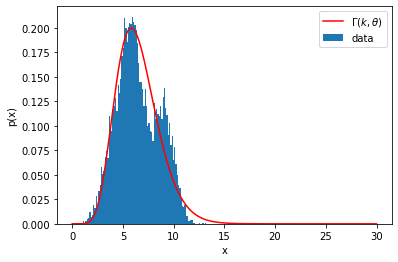

In [13]:
plt.plot(x1, gamma_data, color='red')
plt.hist(data, bins=100, density=True)
plt.legend([r'$\Gamma(k,\theta)$', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3d.png')
plt.show()

## Task E

Likelihood of an assumed dataset $\mathcal{L}(\lambda_0 \mid S) := P_{\lambda_0}[S] = \prod_{i=1}^{n} P_{\lambda_0}[X_i]$ <br> <br>
Average log-likelihood $\ell(\theta \mid S) := \frac{\log \mathcal{L}(\theta \mid S)}{n}$

In [14]:
binom_likelihood = np.sum(binom.logpmf(np.round(data), n, p))/length
binom_likelihood

-2.1570681154346794

In [15]:
gaussian_likelihood = np.sum(gamma.logpdf(data, k, scale=theta))/length
gaussian_likelihood

-2.1608217722067966

Binomial Distribution has a higher likelihood than Gaussian Distribution. Hence the Binomial Distribution was a better fit.

## Task F

In [7]:
moment3 = np.sum(data**3)/length
moment3

360.56586952543273

In [8]:
moment4 = np.sum(data**4)/length
moment4

2968.068491427333

Given 
<div style='text-align: center;'>
    $\mu_1^{gmm} = p_1 \mu_1 + p_2 \mu_2$ <br>
    $\mu_2^{gmm} = p_1 (\sigma_1^2 + \mu_1^2 ) + p_2 (\sigma_2^2 + \mu_2^2)$ <br>
    $\mu_3^{gmm} = p_1 (\mu_1^3 + 3\mu_1 \sigma_1^2 ) + p_2 (\mu_2^3 + 3\mu_2 \sigma_2^2)$ <br>
    $\mu_4^{gmm} = p_1 (\mu_1^4 + 6\mu_1^2 \sigma_1^2 + 3\sigma_1^4 ) + p_2 (\mu_2^4 + 6\mu_2^2 \sigma_2^2 + 3\sigma_2^4)$
</div>
Using the equations to approximate $(\mu_1^\ast, p_1^\ast, \mu_2^\ast, p_2^\ast)$

In [18]:
def gaussian_mixture_app(x):
    return [x[1]*x[0]+x[3]*x[2] - moment1,
            x[1]*(1+x[0]*x[0]) + x[3]*(1+x[2]*x[2]) - moment2,
            x[1]*(x[0]*x[0]*x[0] + 3*x[0]) + x[3]*(x[2]*x[2]*x[2] + 3*x[2]) - moment3,
            x[1]*(x[0]*x[0]*x[0]*x[0] + 6*x[0]*x[0] + 3) + x[3]*(x[2]*x[2]*x[2]*x[2] + 6*x[2]*x[2] + 3) - moment4]

In [19]:
m1, p1, m2, p2 = fsolve(gaussian_mixture_app, [1, 1, 1, 1])
m3 = 0
while (m1 != m3):
    m3 = m1
    m1, p1, m2, p2 = fsolve(gaussian_mixture_app, [m1, p1, m2, p2])
m1, p1, m2, p2

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(5.129607694285331, 0.6118740341610674, 8.774363054416453, 0.3826456511927511)

$\mu_1^\ast = 5.129442774945635, p_1^\ast = 0.6118628674761679, \mu_2^\ast = 8.774442386057544$ and $p_2^\ast = 0.38265742239756445$

In [20]:
x = np.linspace(0, 30, 1000)
gaussian_mixture = p1 * norm.pdf(x, m1) + p2 * norm.pdf(x, m2)

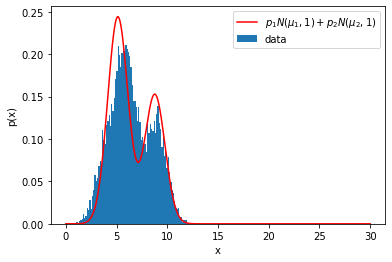

In [21]:
plt.plot(x, gaussian_mixture, color='red')
plt.hist(data, bins=100, density=True)
plt.legend(['$p_1N(\mu_1, 1) + p_2N(\mu_2, 1)$', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3f.png')
plt.show()

In [22]:
gaussian_likelihood = np.sum(np.log(p1 * norm.pdf(data, m1) + p2 * norm.pdf(data, m2)))/length
gaussian_likelihood

-2.1830387449113173

## Teaser

In [9]:
moment6 = np.sum(data**6)/length
moment6

229554.97759417215

In [10]:
moment5 = np.sum(data**5)/length
moment5

25621.864941277425

In [25]:
def gaussian_mixture_app(x):
    return [
        x[1] * x[0] + x[3] * x[2] - moment1,
        x[1] * (x[4] * x[4] + x[0] * x[0]) + x[3] * (x[5] * x[5] + x[2] * x[2]) - moment2,
        x[1] * (x[0] * x[0] * x[0] + 3 * x[0] * x[4] * x[4]) + x[3] * (x[2] * x[2] * x[2] + 3 * x[2] * x[5] * x[5]) - moment3,
        x[1] * (x[0] * x[0] * x[0] * x[0] + 6 * x[0] * x[0] * x[4] * x[4] + 3 * x[4] * x[4] * x[4] * x[4]) + x[3] * (x[2] * x[2] * x[2] * x[2] + 6 * x[2] * x[2] * x[5] * x[5] + 3 * x[5] * x[5] * x[5] * x[5]) - moment4,
        x[1] * (x[0] * x[0] * x[0] * x[0] * x[0] + 10 * x[0] * x[0] * x[0] * x[4] * x[4] + 9 * x[0] * x[4] * x[4] * x[4] * x[4]) + x[3] * (x[2] * x[2] * x[2] * x[2] * x[2] + 10 * x[2] * x[2] * x[2] * x[5] * x[5] + 9 * x[2] * x[5] * x[5] * x[5] * x[5]) - moment5,
        x[1] * (x[0] * x[0] * x[0] * x[0] * x[0] * x[0] + 15 * x[0] * x[0] * x[0] * x[0] * x[4] * x[4] + 39 * x[0] * x[0] * x[4] * x[4] * x[4] * x[4] + 9 * x[4] * x[4] * x[4] * x[4] * x[4] * x[4]) + x[3] * (x[2] * x[2] * x[2] * x[2] * x[2] * x[2] + 15 * x[2] * x[2] * x[2] * x[2] * x[5] * x[5] + 39 * x[2] * x[2] * x[5] * x[5] * x[5] * x[5] + 9 * x[5] * x[5] * x[5] * x[5] * x[5] * x[5]) - moment6
    ]


In [26]:
m1, p1, m2, p2, sigma1, sigma2 = fsolve(gaussian_mixture_app, [1, 1, 1, 1, 1, 1])
m3 = 0
while (m1 != m3):
    m3 = m1
    m1, p1, m2, p2, sigma1, sigma2 = fsolve(gaussian_mixture_app, [m1, p1, m2, p2, sigma1, sigma2])
m1, p1, m2, p2, sigma1, sigma2

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [27]:
x = np.linspace(0, 30, 1000)
gaussian_mixture = p1 * norm.pdf(x, m1, scale=sigma1) + p2 * norm.pdf(x, m2, scale=sigma2)

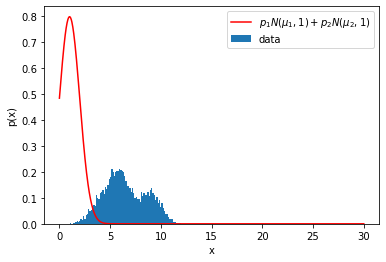

In [28]:
plt.plot(x, gaussian_mixture, color='red')
plt.hist(data, bins=100, density=True)
plt.legend(['$p_1N(\mu_1, 1) + p_2N(\mu_2, 1)$', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3f.png')
plt.show()

array([4.83941449e-001, 4.98469825e-001, 5.12971548e-001, 5.27419319e-001,
       5.41785206e-001, 5.56040728e-001, 5.70156941e-001, 5.84104538e-001,
       5.97853942e-001, 6.11375409e-001, 6.24639130e-001, 6.37615344e-001,
       6.50274442e-001, 6.62587078e-001, 6.74524287e-001, 6.86057589e-001,
       6.97159108e-001, 7.07801683e-001, 7.17958975e-001, 7.27605575e-001,
       7.36717116e-001, 7.45270367e-001, 7.53243337e-001, 7.60615369e-001,
       7.67367226e-001, 7.73481175e-001, 7.78941069e-001, 7.83732413e-001,
       7.87842430e-001, 7.91260118e-001, 7.93976299e-001, 7.95983660e-001,
       7.97276786e-001, 7.97852182e-001, 7.97708294e-001, 7.96845511e-001,
       7.95266164e-001, 7.92974518e-001, 7.89976751e-001, 7.86280926e-001,
       7.81896958e-001, 7.76836563e-001, 7.71113214e-001, 7.64742073e-001,
       7.57739933e-001, 7.50125136e-001, 7.41917497e-001, 7.33138220e-001,
       7.23809802e-001, 7.13955940e-001, 7.03601432e-001, 6.92772070e-001,
       6.81494535e-001, 6

In [30]:
fsolve(gaussian_mixture_app, [1, 1, 1, 1, 1, 1])

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([1., 1., 1., 1., 1., 1.])

In [31]:
gaussian_mixture_app([1, 1, 1, 1, 1, 1])

[-4.496145618324817,
 -42.554361807879815,
 -352.56586952543273,
 -2948.068491427333,
 -25581.864941277425,
 -229426.97759417215]

In [135]:
def func(x):
    p1 = x[0]
    p2 = x[1]
    k1 = x[2]
    k2 = x[3]
    theta1 = x[4]
    theta2 = x[5]
    return [
        p1+p2 - 1,
        p1*k1*theta1 + p2*k2*theta2 - moment1,
        p1*k1*(k1+1)*(theta1**2) + p2*k2*(k2+1)*(theta2**2) - moment2,
        p1*k1*(k1+1)*(k1+2)*(theta1**3) + p2*k2*(k2+1)*(k2+2)*(theta2**3) - moment3,
        p1*k1*(k1+1)*(k1+2)*(k1+3)*(theta1**4) + p2*k2*(k2+1)*(k2+2)*(k2+3)*(theta2**4) - moment4,
        p1*k1*(k1+1)*(k1+2)*(k1+3)*(k1+4)*(theta1**5) + p2*k2*(k2+1)*(k2+2)*(k2+3)*(k2+4)*(theta2**5) - moment5,
        # p1*k1*(k1+1)*(k1+2)*(k1+3)*(k1+4)*(k1+5)*(theta1**6) + p2*k2*(k2+1)*(k2+2)*(k2+3)*(k2+4)*(k2+5)*(theta2**6) - moment6
    ]

In [136]:
# p3 = 0.5
# while p1 + p2 > 1:
p1, p2, k1, k2, theta1, theta2 = fsolve(func, [0.5, 1, 1, 0.5, 1, 1])
    # p3 = p1

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [137]:
func([p1, p2, k1, k2, theta1, theta2])

[0.42370468344484435,
 -4.13500426872992,
 -39.273064291555585,
 -327.53788369880095,
 -2769.9998540343286,
 -24145.51006859342]

In [138]:
p1, p2, k1, k2, theta1, theta2 = fsolve(func, [p1, p2, k1, k2, theta1, theta2])

In [139]:
p1, k1, theta1, p2, k2, theta2

(0.33532029086648324,
 4.970146476667409,
 1.5738378980296668,
 0.6646797049817961,
 1.7835710064955865,
 1.3957452372437034)

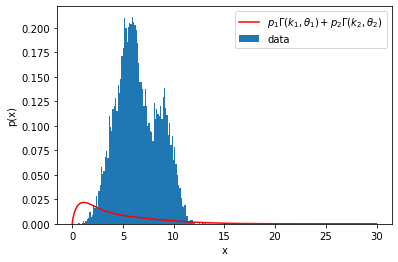

In [140]:
x = np.linspace(0, 30, 1000)
gamma_mixture = (p1 * gamma.pdf(x, k1, scale=theta1) + p2 * gamma.pdf(x, k2, scale=theta2)) / 8.935439866578184
plt.plot(x, gamma_mixture, color='red')
plt.hist(data, bins=100, density=True)
plt.legend([r'$p_1\Gamma(k_1, \theta_1) + p_2\Gamma(k_2, \theta_2)$', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3g.png')
plt.show()

In [141]:
moment1, moment2, moment3, moment4, moment5, moment6

(6.496145618324817,
 46.554361807879815,
 360.56586952543273,
 2968.068491427333,
 25621.864941277425,
 229554.97759417215)

In [142]:
def gaussian_gamma_mixture(x):
    p1 = x[0]
    p2 = x[1]
    mu = x[2]
    sigma = x[3]
    k = x[4]
    theta = x[5]

    return [
        p1*mu + p2*k*theta - moment1,
        p1*(sigma**2 + mu**2) + p2*(k*(k+1)*(theta**2)) - moment2,
        p1*(mu**3 + 3*mu*(sigma**2)) + p2*(k*(k+1)*(k+2)*(theta**3)) - moment3,
        p1*(mu**4 + 6*mu**2*(sigma**2) + 3*(sigma**4)) + p2*(k*(k+1)*(k+2)*(k+3)*(theta**4)) - moment4,
        p1*(mu**5 + 10*mu**3*(sigma**2) + 15*mu*(sigma**4)) + p2*(k*(k+1)*(k+2)*(k+3)*(k+4)*(theta**5)) - moment5,
        p1*(mu**6 + 15*mu**4*(sigma**2) + 45*mu**2*(sigma**4) + 15*(sigma**6)) + p2*(k*(k+1)*(k+2)*(k+3)*(k+4)*(k+5)*(theta**6)) - moment6
    ]

In [143]:
p1, p2, mu, sigma, k, theta = fsolve(gaussian_gamma_mixture, [0.5, 0.5, 1, 1, 1, 1])

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [144]:
p1, p2, mu, sigma, k, theta

(5.027249046986647,
 0.5532281985748728,
 3.12268085753623,
 0.8109001233364491,
 1.0412888912270695,
 0.9748624198257986)

In [145]:
fsolve(gaussian_gamma_mixture, [p1, p2, mu, sigma, k, theta])

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([ 1.22585768, -0.0107878 ,  6.06284958,  2.19412276, -0.700909  ,
       -0.41532201])

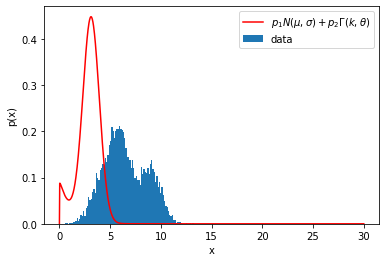

In [147]:
x = np.linspace(0, 30, 1000)
gaussian_gamma = (p1 * norm.pdf(x, mu, scale=sigma) + p2 * gamma.pdf(x, k, scale=theta))/(p1+p2)
plt.plot(x, gaussian_gamma, color='red')
plt.hist(data, bins=100, density=True)
plt.legend([r'$p_1N(\mu, \sigma) + p_2\Gamma(k, \theta)$', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3h.png')
plt.show()

In [183]:
def gmm(x):
    p1 = x[0]
    p2 = x[1]
    mu1 = x[2]
    mu2 = x[3]
    sigma1 = x[4]
    sigma2 = x[5]

    return [
        p1*mu1 + p2*mu2 - moment1,
        p1*((mu1**2) + (sigma1**2)) + p2*((mu2**2) + (sigma2**2)) - moment2,
        p1*((mu1**3) + 3*mu1*(sigma1**2)) + p2*((mu2**3)+ 3*mu2*(sigma2**2)) - moment3,
        p1*((mu1**4) + 6*(mu1**2)*(sigma1**2) + 3*(sigma1**4)) + p2*((mu2**4) + 6*(mu2**2)*(sigma2**2) + 3*(sigma2**4)) - moment4,
        p1*((mu1**5) + 10*(mu1**3)*(sigma1**2) + 15*mu1*(sigma1**4)) + p2*((mu2**5) + 10*(mu2**3)*(sigma2**2) + 15*mu2*(sigma2**4)) - moment5,
        p1*(mu1**6 + 15*(mu1**4)*(sigma1**2) + 45*(mu1**2)*(sigma1**4) + 15*(sigma1**6)) + p2*((mu2**6) + 15*(mu2**4)*(sigma2**2) + 45*(mu2**2)*sigma2**4 + 15*(sigma2**6)) - moment6
    ]

In [184]:
p1, p2, mu1, mu2, sigma1, sigma2 = fsolve(gmm, [0.5, 0.5, 1, 1, 1, 1])

In [185]:
p1, p2, mu1, mu2, sigma1, sigma2 = fsolve(gmm, [p1, p2, mu1, mu2, sigma1, sigma2])

In [188]:
p1, p2, mu1, mu2, sigma1, sigma2

(15.990690867180229,
 6.550180419449392,
 -0.4887226719237469,
 0.7160391270929104,
 -1.4878963777561494,
 -1.5925673256029236)

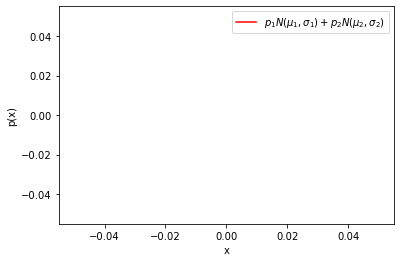

In [189]:
x = np.linspace(0, 30, 1000)
gmm_data = (p1 * norm.pdf(x, mu1, scale=sigma1) + p2 * norm.pdf(x, mu2, scale=sigma2))/(p1+p2)
plt.plot(x, gmm_data, color='red')
# plt.hist(data, bins=100, density=True)
plt.legend([r'$p_1N(\mu_1, \sigma_1) + p_2N(\mu_2, \sigma_2)$', 'data'])
plt.ylabel('p(x)')
plt.xlabel('x')
# plt.savefig('../images/3i.png')
plt.show()

In [191]:
gmm_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na